In [ ]:
""""
Koraci po redu:
1. Dodavanje biblioteka
2. Ucitavanje podataka
3. Provera koliko ima praznih podataka po kolonama
4. Overview podataka
5. Crtanje podataka
6. Trazenje korelacija izmedju podataka
7. Igranje sa podacima
8. Puno igranja sa podacima (Izbacivanje, modifikovanje)
9. Razdvajanje kolone koje pogadjamo i atributa (X i y) + Train test split 
10. Normalizacija
11. Kreiranje modela i dodavanje slojeva
12. Treniranje
13. Evaluacija nakon treniranja (plotovanje podataka loss-ova) i analiza
14. Cross validacija
15. Predikcija
16. Evaluacija
"""

In [6]:
# 1. Dodavanje biblioteka
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [94]:
#Ucitavanje dataseta
df = pd.read_csv('TF_2_Notebooks_and_Data/DATA/lending_club_loan_two.csv')
df_info = pd.read_csv('TF_2_Notebooks_and_Data/DATA/lending_club_info.csv')

In [18]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [13]:
df.head()
#dti, open_acc, int_rate,  pub_rec (mzd izbaciti), revol_bal, revol_util, application_type(mozda izbaciti), pub_rec_bankruptcies(mzd izbaciti), adress(mzd izbaciti)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [97]:
df.isnull().sum()
#Definitivno ima kolona i redova gde su null vrednosti

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [96]:
df = df.dropna() #Izbacio sam nekih 15% podataka

<Axes: xlabel='loan_status', ylabel='count'>

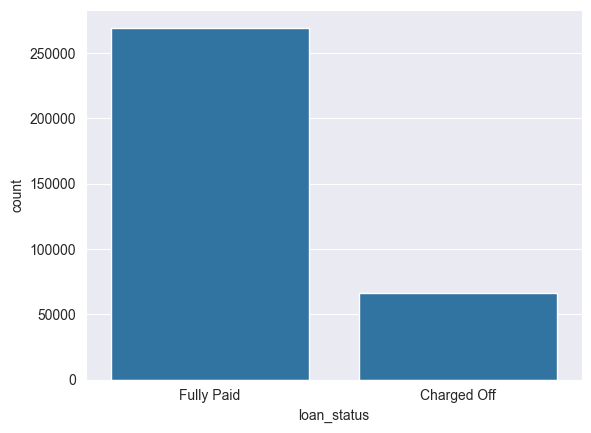

In [43]:
#Provera izbalansiranosti skupa
sns.countplot(x='loan_status', data=df) #Jako neizbalansiran skup  269555 Fully paid 66312

In [92]:
#Treba srediti sada kolone koje imaju svrhe, a koje ne + treba konvertovati kolone iz stringa u broj
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [80]:
def grab_two_letters(state):
    return int(state[:2])
grab_two_letters("36 months") + 2

38

In [98]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

<Axes: xlabel='term', ylabel='count'>

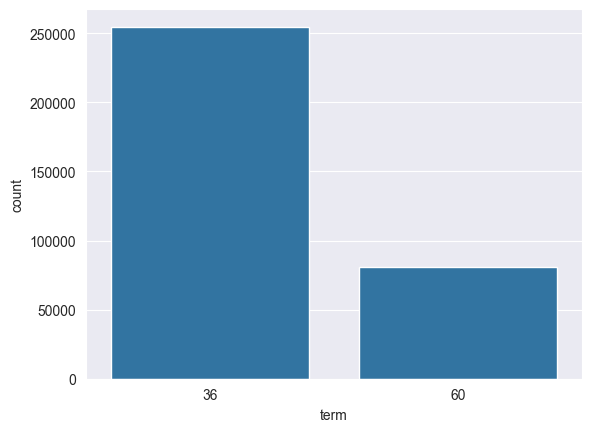

In [101]:
sns.countplot(x=df['term'],data=df)